# Reproduction de la technique de détection des lignes sur la route d'après Freeman 1991 MIT

A l'heure actuelle le problème d'utilisation des filtres orientables provient de la sortie de la convolution 
- là où pour le canny edge les valeurs sont soit 0 soit 255. 
- celles du steerable filters varient entre des valeurs très négatives et des valeurs très positives. 

Le post traitement de steerable filters n'est peut-être pas adapté. Histoire des energies et orientations. 

cluster lines together ? 


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sc
import cv2
import sys

np.set_printoptions(threshold=sys.maxsize)

## Edge Detection with second order filters

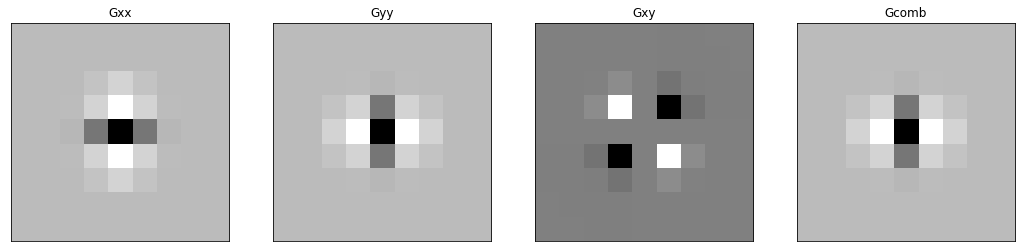

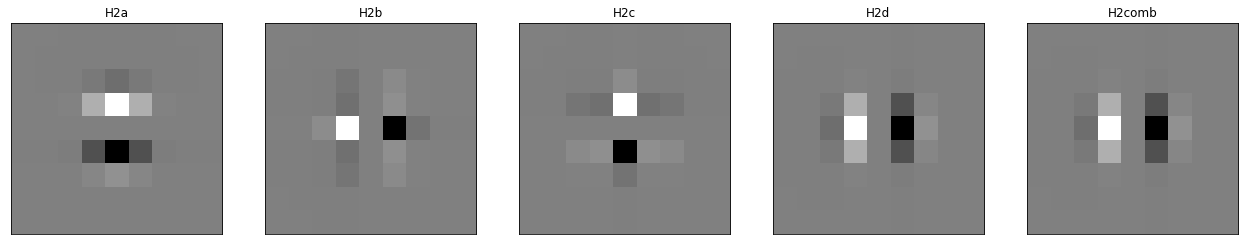

In [2]:
sigma=1.0
theta=-np.pi/2

filter_size = 2 * int(4 * sigma + 0.5) + 1 # taille du filtre en fonction du sigma recherché 

# Second order filter initialization
Gxx = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide 
Gyy = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide
Gxy = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide
Gcomb = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide

H2a = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide 
H2b = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide
H2c = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide
H2d = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide
H2comb = np.zeros((filter_size, filter_size), np.float32) # création du filtre vide

m = filter_size//2
n = filter_size//2
    
for x in range(-m, m+1):
    for y in range(-n, n+1):
        
        # Second order 
        # le filtre est balayé de par le centre d'où la range selon x et selon y 
        Gxx[x+m, y+n] = 0.9213*(2*x**2-1)*np.exp(-(x**2 + y**2))
        Gyy[x+m, y+n] = 0.9213*(2*y**2-1)*np.exp(-(x**2 + y**2))
        Gxy[x+m, y+n] = 1.843*x*y*np.exp(-(x**2 + y**2))
        
        
        H2a[x+m, y+n] = 0.9780*(-2.254*x+x**3)*np.exp(-(x**2+y**2))
        H2b[x+m, y+n] = 0.9780*(-0.7515+x**2)*y*np.exp(-(x**2 + y**2))
        H2c[x+m, y+n] = 0.9780*(-0.7515+y**2)*x*np.exp(-(x**2 + y**2))
        H2d[x+m, y+n] = 0.9780*(-2.254*y+y**3)*np.exp(-(x**2+y**2))
        

G2comb = np.cos(theta)**2*Gxx + np.sin(theta)**2*Gyy - 2*np.sin(theta)*np.cos(theta)*Gxy
H2comb = np.cos(theta)**3*H2a - 3*np.cos(theta)**2*np.sin(theta)*H2b + 3*np.cos(theta)*np.sin(theta)**2*H2c - np.sin(theta)**3*H2d

        
plt.figure(figsize=(18, 8)) 
plt.subplot(141),
plt.imshow(Gxx, cmap='gray')
plt.title('Gxx'), plt.xticks([]), plt.yticks([])
plt.subplot(142),
plt.imshow(Gyy, cmap='gray')
plt.title('Gyy'), plt.xticks([]), plt.yticks([])
plt.subplot(143),
plt.imshow(Gxy, cmap='gray')
plt.title('Gxy'), plt.xticks([]), plt.yticks([])
plt.subplot(144),
plt.imshow(G2comb, cmap='gray')
plt.title('Gcomb'), plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(22, 8))
plt.subplot(151),
plt.imshow(H2a, cmap='gray')
plt.title('H2a'), plt.xticks([]), plt.yticks([])
plt.subplot(152),
plt.imshow(H2b, cmap='gray')
plt.title('H2b'), plt.xticks([]), plt.yticks([])
plt.subplot(153),
plt.imshow(H2c, cmap='gray')
plt.title('H2c'), plt.xticks([]), plt.yticks([])
plt.subplot(154),
plt.imshow(H2d, cmap='gray')
plt.title('H2d'), plt.xticks([]), plt.yticks([])
plt.subplot(155),
plt.imshow(H2comb, cmap='gray')
plt.title('H2comb'), plt.xticks([]), plt.yticks([])

plt.show()

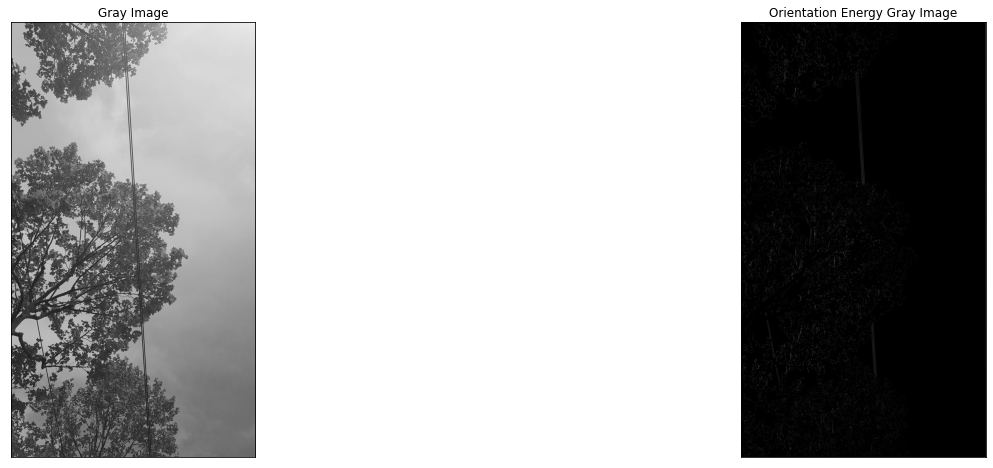

In [4]:
import scipy.signal as signal

img = cv2.imread('./images/tree_edge.jpg')
#img = cv2.imread('catenaire.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

G2conv = signal.convolve2d(gray, G2comb)
H2conv = signal.convolve2d(gray, H2comb)
E2 = G2conv**2 + H2conv**2

#low_threshold, high_threshold = [200, 300]
#grad = cv2.Canny(gray, low_threshold, high_threshold)

plt.figure(figsize=(24, 8)) 
plt.subplot(121),
plt.imshow(gray,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(E2,cmap = 'gray')
plt.title('Orientation Energy Gray Image'), plt.xticks([]), plt.yticks([])

plt.show()

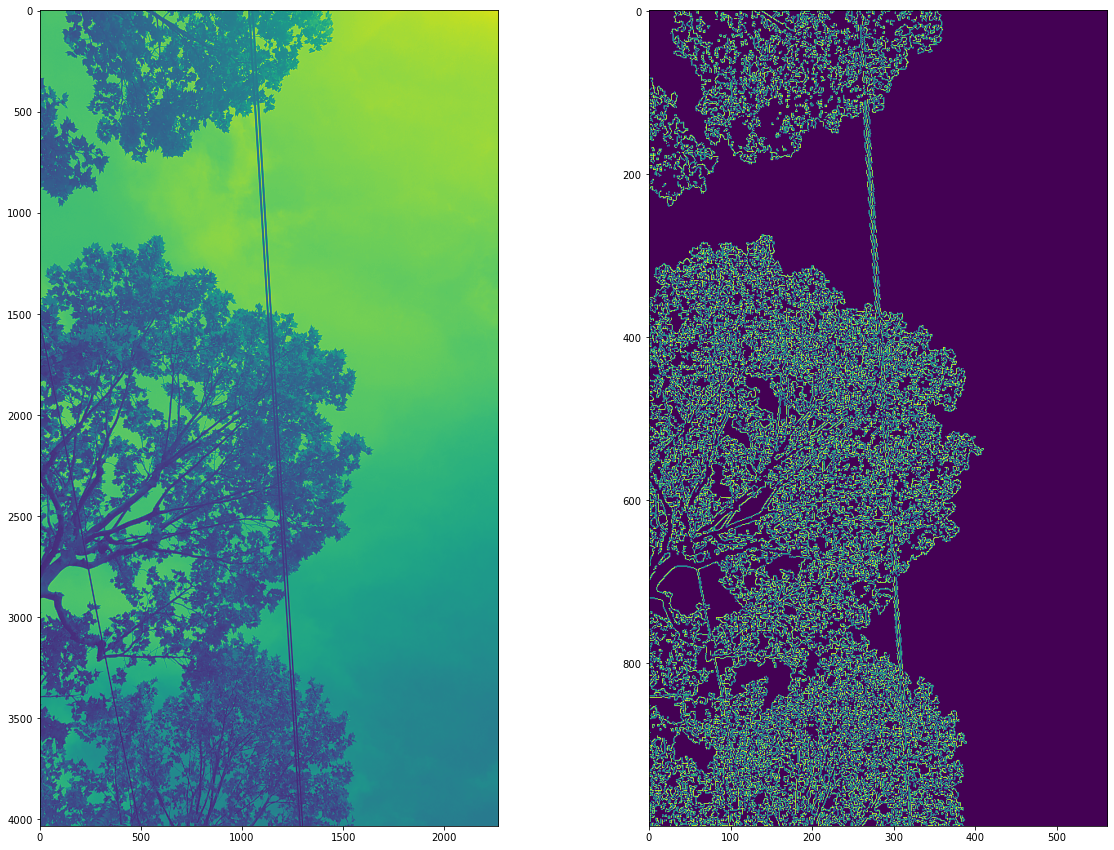

In [37]:
img = cv2.imread('./images/tree_edge.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

shape = gray.shape

width = int(1000 * shape[1] / shape[0])
height = 1000

# dsize
dsize = (width, height)

res = cv2.resize(gray, dsize)
res = cv2.Canny(res, 50, 150)

plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(gray)
plt.subplot(122)
plt.imshow(res)
plt.show()

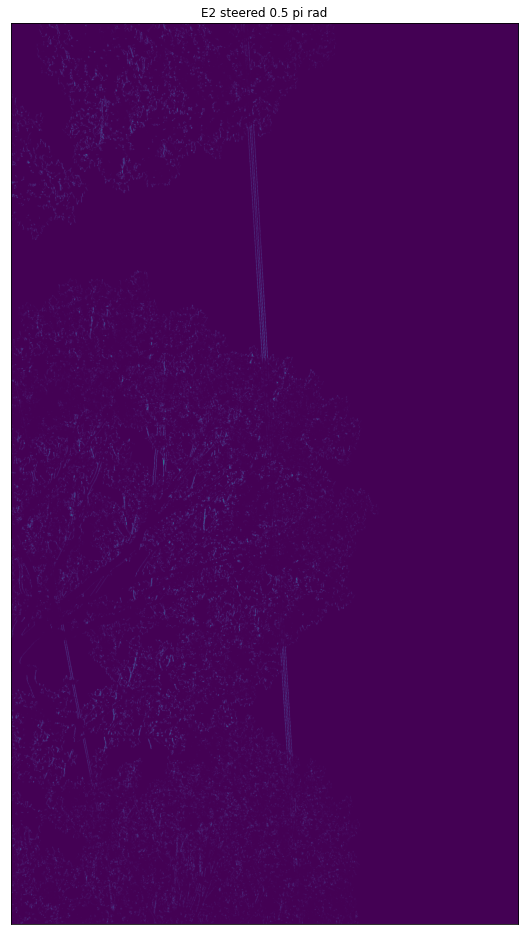

In [44]:
import scipy.signal as signal

img = cv2.imread('./images/tree_edge.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray,(3,3),0)
gray = cv2.addWeighted(gray,1.5,blur,-0.5,0)

#gray = res
# gray = cv2.reshape()

sigma=1.0
#filter_size = 2 * int(4 * sigma + 0.5) + 1 # taille du filtre en fonction du sigma recherché 
filter_size = 5
# Second order filter initialization
G2 = np.zeros((filter_size, filter_size, 3), np.float32) # création du filtre vide 
H2 = np.zeros((filter_size, filter_size, 4), np.float32) # création du filtre vide 

m = filter_size//2
n = filter_size//2
    
for x in range(-m, m+1):
    for y in range(-n, n+1):
        
        # Second order 
        # le filtre est balayé de par le centre d'où la range selon x et selon y 
        G2[x+m, y+n,0] = 0.9213*(2*x**2-1)*np.exp(-(x**2 + y**2))
        G2[x+m, y+n,1] = 1.843*x*y*np.exp(-(x**2 + y**2))
        G2[x+m, y+n,2] = 0.9213*(2*y**2-1)*np.exp(-(x**2 + y**2))
                
        #H2[x+m, y+n,0] = 0.9780*(-2.254*x+x**3)*np.exp(-(x**2+y**2))
        #H2[x+m, y+n,1] = 0.9780*(-0.7515+x**2)*y*np.exp(-(x**2 + y**2))
        #H2[x+m, y+n,2] = 0.9780*(-0.7515+y**2)*x*np.exp(-(x**2 + y**2))
        #H2[x+m, y+n,3] = 0.9780*(-2.254*y+y**3)*np.exp(-(x**2+y**2))

# theta=-np.pi/2
Start=False
#for theta in np.linspace(-np.pi/2, 3*np.pi/2, 20):
# for theta in np.linspace(np.pi/2 - np.pi/8 , np.pi/2 + np.pi/8, 3):
for theta in [np.pi/2]:
    kG2 = [np.cos(theta)**2, - 2*np.sin(theta)*np.cos(theta), np.sin(theta)**2]
    #kH2 = [np.cos(theta)**3, - 3*np.cos(theta)**2*np.sin(theta), 3*np.cos(theta)*np.sin(theta)**2, - np.sin(theta)**3]
    
    G2comb = kG2[0]*G2[:,:,0] +kG2[1]*G2[:,:,1] +kG2[2]*G2[:,:,2]
    #H2comb = kH2[0]*H2[:,:,0] +kH2[1]*H2[:,:,1] +kH2[2]*H2[:,:,2]+kH2[3]*H2[:,:,3]
    
    G2conv = signal.convolve2d(gray, G2comb)
    #H2conv = signal.convolve2d(gray, H2comb)
    E2 = G2conv**2 # + H2conv**2
    
    #if Start is False:
    #    E2_Max = E2
    #    Theta_Max = np.ones(E2.shape, np.float32)*theta
    #    Start=True
   # 
   # for i in range(E2.shape[0]):
   #     for j in range(E2.shape[1]):
   #         if E2[i,j]>E2_Max[i,j]:
   #             Theta_Max[i,j]=theta
   #             E2_Max[i,j]=E2[i,j]
                
        
    plt.figure(figsize=(20, 20))
    plt.subplot(121),
    plt.imshow(E2)
    plt.title('E2 steered {} pi rad'.format(theta/np.pi)), plt.xticks([]), plt.yticks([])
#plt.subplot(122),
#plt.imshow(E2_Max, cmap='gray')
#plt.title('E2_Max'), plt.xticks([]), plt.yticks([])
    plt.show()

In [30]:
cv2.imwrite('res_cannydefault.jpeg', res)

True

In [ ]:
np.amax(E2)

In [8]:
print(np.amin(Theta_Max))
print(np.amax(Theta_Max))

-1.5707964
4.6489224


In [ ]:
plt.figure(figsize=(20,8))

plt.imshow(E2_Max)
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))

plt.imshow(Theta_Max)
plt.colorbar()
plt.show()

In [15]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi # img like orientation matrix
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [16]:
img = non_max_suppression(E2_Max, Theta_Max)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(img)
plt.show()

In [18]:

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    print(img.shape)
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [28]:
thresholded, weak, strong = threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09)
print(thresholded.shape)

(265, 493)
(265, 493)


In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(thresholded)
plt.show()

In [30]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [31]:
hyst = hysteresis(thresholded, weak, strong)

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(hyst)
plt.show()

In [ ]:
print('Image size = {}'.format(img.shape))
print('Gray size = {}'.format(gray.shape))
print('Steerable Edge Detection size = {}'.format(grad_extra.shape))

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(E2,cmap = 'gray')
plt.show()

In [ ]:
for i in range()

## Crop to new dimensions 

## Define a Region of Interest 

In [ ]:
# import cv2
import imutils
# import numpy as np
# import joblib
 
pts = [] # for storing points
 
 
 # :mouse callback function
def draw_roi(event, x, y, flags, param):
    img2 = img.copy()
 
    if event == cv2.EVENT_LBUTTONDOWN: # Left click, select point
        pts.append((x, y))  
 
    if event == cv2.EVENT_RBUTTONDOWN: # Right click to cancel the last selected point
        pts.pop()  
 
    if event == cv2.EVENT_MBUTTONDOWN: # 
        mask = np.zeros(img.shape, np.uint8)
        points = np.array(pts, np.int32)
        points = points.reshape((-1, 1, 2))
                 # 
        mask = cv2.polylines(mask, [points], True, (255, 255, 255), 2)
        mask2 = cv2.fillPoly(mask.copy(), [points], (255, 255, 255)) # for ROI
        mask3 = cv2.fillPoly(mask.copy(), [points], (0, 255, 0)) # for displaying images on the desktop
 
        show_image = cv2.addWeighted(src1=img, alpha=0.8, src2=mask3, beta=0.2, gamma=0)
 
        cv2.imshow("mask", mask2)
        cv2.imshow("show_img", show_image)
 
        ROI = cv2.bitwise_and(mask2, img)
        cv2.imshow("ROI", ROI)
        cv2.waitKey(0)
 
    if len(pts) > 0:
                 # Draw the last point in pts
        cv2.circle(img2, pts[-1], 3, (0, 0, 255), -1)
 
    if len(pts) > 1:
                 # 
        for i in range(len(pts) - 1):
            cv2.circle(img2, pts[i], 5, (0, 0, 255), -1) # x ,y is the coordinates of the mouse click place
            cv2.line(img=img2, pt1=pts[i], pt2=pts[i + 1], color=(255, 0, 0), thickness=2)
 
    cv2.imshow('image', img2)
 
 
 #Create images and windows and bind windows to callback functions
# img = cv2.imread('HL.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = imutils.resize(img, width=500)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_roi)
print("[INFO] Click the left button: select the point, right click: delete the last selected point, click the middle button: determine the ROI area")
print("[INFO] Press ‘S’ to determine the selection area and save it")
print("[INFO] Press ESC to quit")
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
    if key == ord("s"):
        saved_data = pts
        #joblib.dump(value=saved_data, filename="config.pkl")
        #print("[INFO] ROI coordinates have been saved to local.")
        print(saved_data)
        break
cv2.destroyAllWindows()
#saved_data = [(4, 165), (221, 34), (245, 10), (282, 10), (303, 37), (484, 162), (479, 258), (5, 258), (6, 167)]
# source https://www.programmersought.com/article/3449903953/

In [ ]:
# Setting the corners of the trapezium
#vertices = np.array([[(0, img_line.shape[0]), (img_line.shape[1], img_line.shape[0]), (400, 260), (600, 260)]])

# make a blank/white image
mask = np.zeros_like(gray)
mask_channels = (255,) * img.shape[2]

# Fill the area of interest with 0 and 255 these
# which lie outside of it, thoughout all color channels
cv2.fillPoly(mask, [np.array(saved_data)], mask_channels)

print('Image size = {}'.format(img.shape))
print('Gray size = {}'.format(gray.shape))
print('Grad size = {}'.format(grad.shape))
print('Mask size = {}'.format(mask.shape))

# Keep only the pixels with 0 value of the canny_img
# remplace la ROI1 dans l'image 1 par la ROI2 dans l'image 2 en utilisant le masque
# seule possibilité pour avoir un résultat potable 
# https://docs.opencv.org/master/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14 pour plus d'infos 
masked_grad = cv2.bitwise_and(grad, grad, mask=mask)

# source https://towardsdatascience.com/line-detection-make-an-autonomous-car-see-road-lines-e3ed984952c

In [ ]:
plt.figure(figsize=(16, 6)) 
plt.subplot(121),
plt.imshow(mask, cmap='gray')
plt.colorbar()
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(masked_grad ,cmap = 'gray')
plt.title('Masked gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
print(np.amin(grad))
print(np.amax(grad))

In [ ]:
cv2.imwrite('test.jpg', masked_grad)
grad = cv2.imread('test.jpg', 0)

## Lines Aggregation with Hough Transform

In [39]:
lines = cv2.HoughLinesP(image=grad, rho=1, theta=np.pi/180, threshold=100, lines=np.array([]),minLineLength=100, maxLineGap=80)

# Opencv
# rho : The resolution of the parameter r in pixels. FIXED
# theta: The resolution of the parameter θ in radians. FIXED
# threshold: The minimum number of intersections to "*detect*" a line
# minLineLength: The minimum number of points that can form a line. 
    # Lines with less than this number of points are disregarded.
# maxLineGap: The maximum gap between two points to be considered in the same line.

a,b,c = lines.shape
print(lines.shape)
for i in range(a):
    l = lines[i][0]
    cv2.line(img, (l[0], l[1]), (l[2], l[3]), (255,0,0), 1, cv2.LINE_AA)
    # cv2.imwrite('houghlines4.jpg', img)
plt.figure(figsize=(16, 8)) 
plt.imshow(img)
plt.show()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6uw63ony\opencv\modules\imgproc\src\hough.cpp:471: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'cv::HoughLinesProbabilistic'


In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(grad,cmap = 'gray')
plt.show()

In [ ]:
cv2.imwrite('HL_masked.jpg', grad)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=8).fit(lines_new)
y_kmeans = kmeans.predict(lines_new)

In [ ]:
plt.scatter(lines_new[:, 0], lines_new[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
lines_new = np.reshape(lines, (21,4) )

In [ ]:
lines.shape

In [ ]:
lines_new

In [ ]:
lines_new[:,0]